<a href="https://colab.research.google.com/github/Arslonbekjon/Classification/blob/main/Decision_Tree_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [3]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
101,45,F,HIGH,HIGH,12.854,drugA
173,41,F,LOW,NORMAL,18.739,drugY
148,61,F,LOW,NORMAL,7.340,drugX
2,47,M,LOW,HIGH,10.114,drugC
182,20,F,LOW,NORMAL,11.686,drugX
146,37,F,LOW,NORMAL,12.006,drugX
187,47,M,HIGH,HIGH,10.403,drugA
50,58,F,HIGH,HIGH,19.416,drugY
133,24,M,NORMAL,HIGH,25.786,drugY
86,51,F,NORMAL,HIGH,13.597,drugX


# Matnli ustunlarga ishlov beramiz

In [4]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
170,28,0,2,0,12.879,drugX
25,28,0,0,1,18.809,drugY
120,28,1,2,0,27.064,drugY
73,41,0,2,1,22.905,drugY
90,62,1,2,0,16.594,drugY
64,60,0,0,0,13.303,drugB
65,68,0,2,1,27.050,drugY
36,32,1,0,1,9.445,drugA
63,45,1,1,1,8.370,drugX
130,70,0,2,0,20.489,drugY


X va y ni ajratib olamiz

In [5]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [6]:
y = df['Drug'].values

# Train/test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

# Model

In [8]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

# Baholash

In [9]:
y_predict = tree_model.predict(X_test)

In [10]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [18]:
print("DecisionTrees's Accuracy: ",accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.95


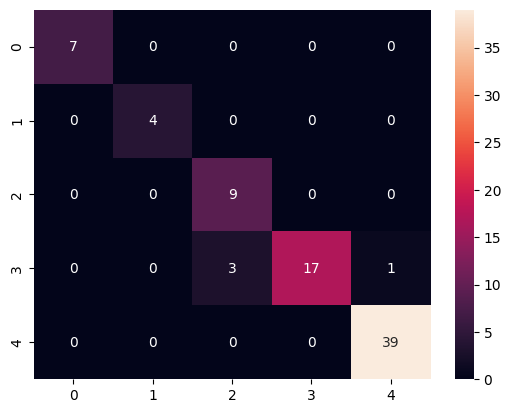

In [13]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

Cross validation

In [19]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



# Decision Tree chizamiz

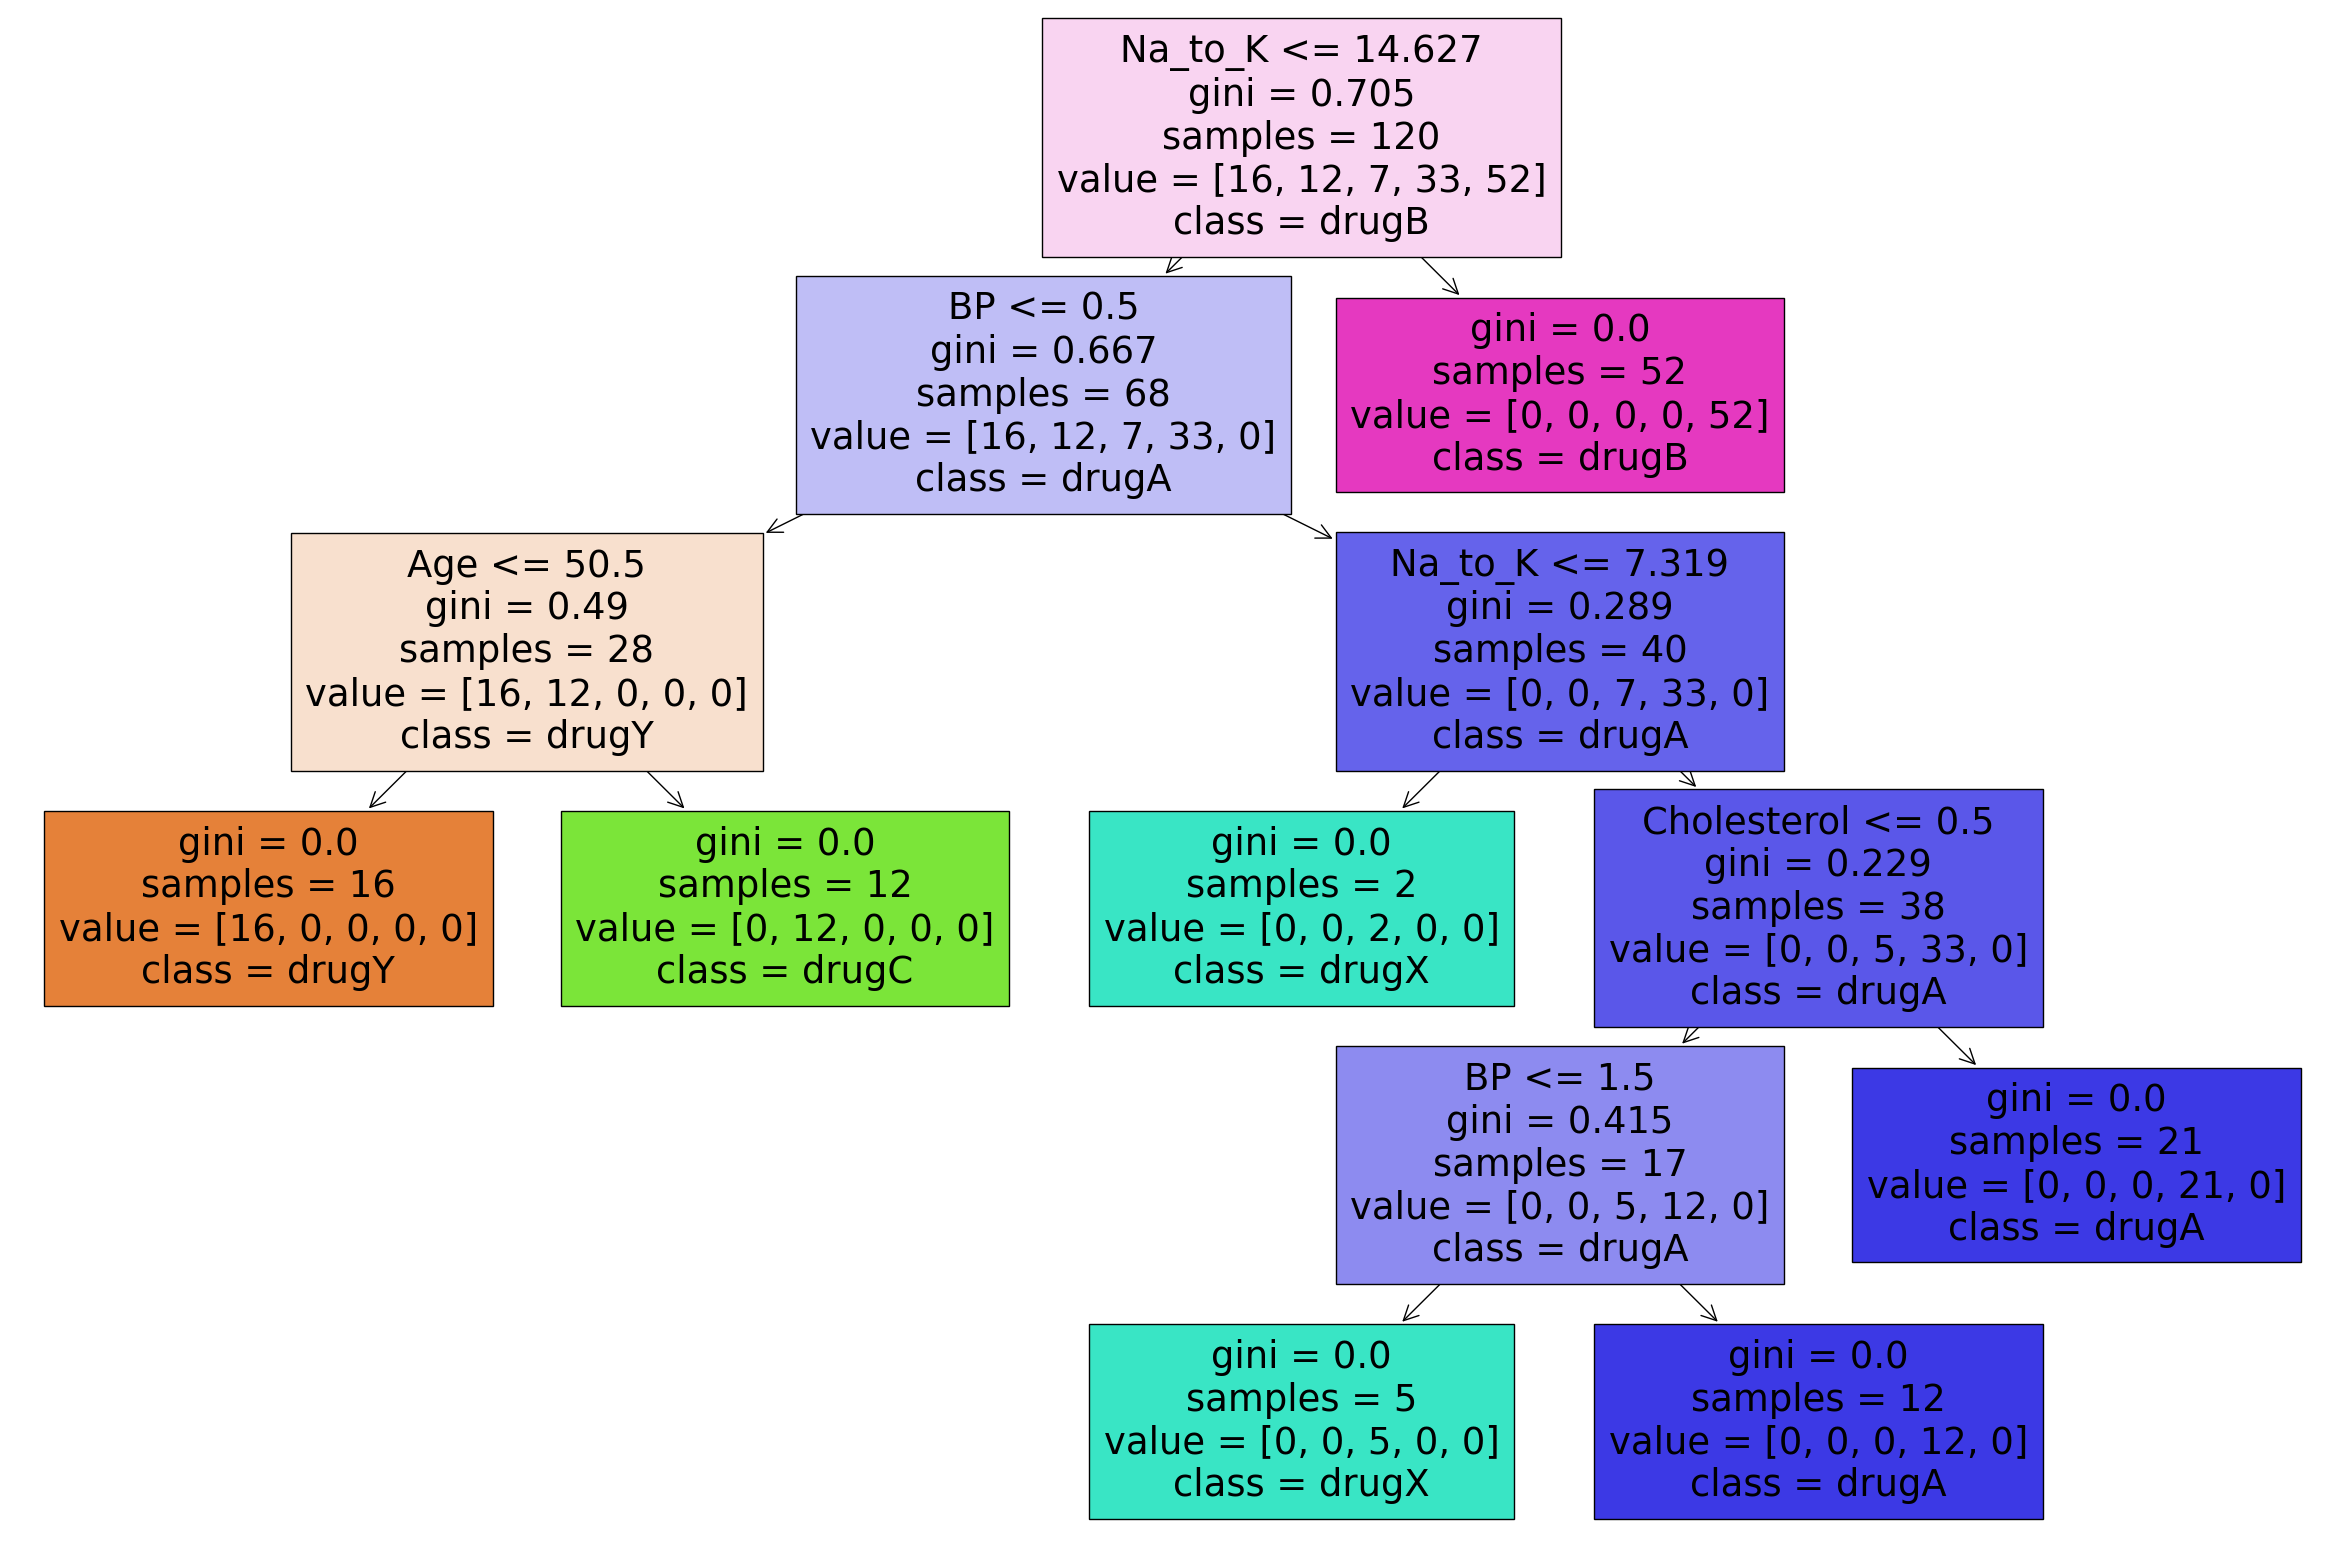

In [20]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

# Hyperparameters
Har bir model o'ziga xos giperparametrlar bilan keladi, biz bu parametrlarni sozlash orqali model aniqligini yoki tezligini oshirishimiz mumkin.

k-NN uchun bu k ya'ni qo'shnilar soni edi. Decision Tree da esa bir nechta giperparametrlar mavjud. Barcha parametrlarni ushbu link orqali ko'rishingiz mumkin: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

`min_impurity_decrease' - natija qanchalik "toza" bo'lishini belgilaydi. Standart qiymati 0



DecisionTrees's Accuracy:  0.95


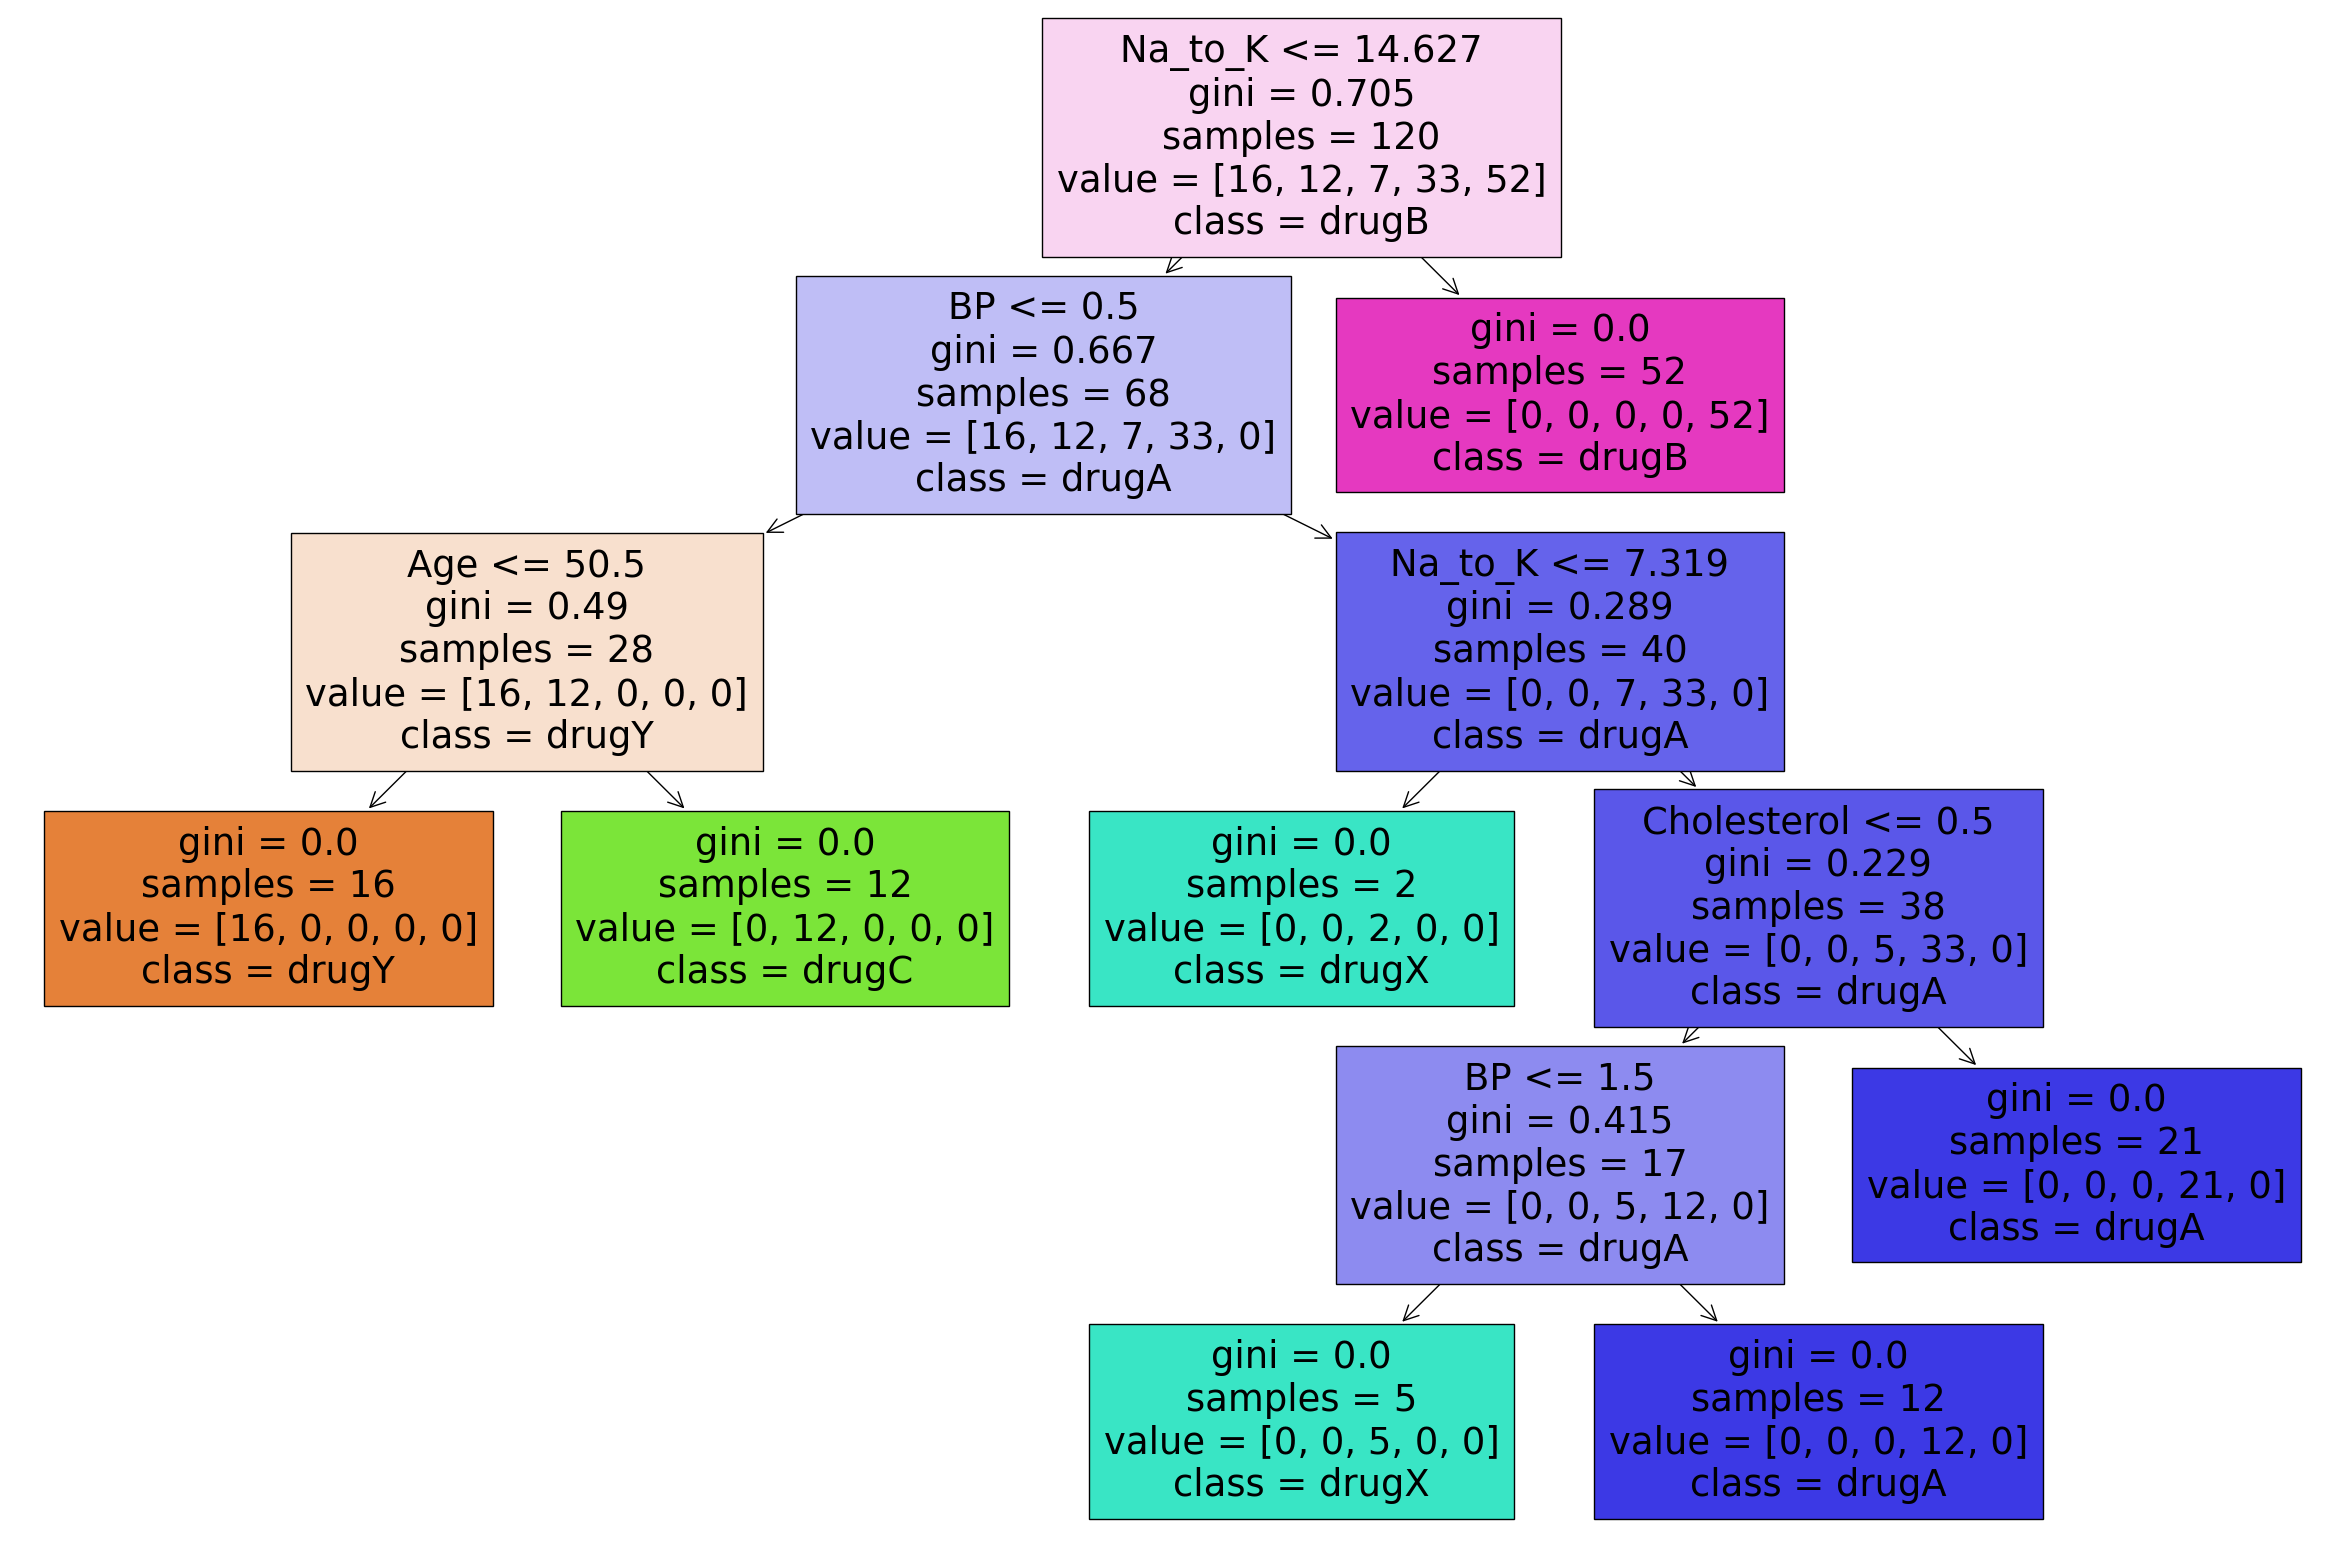

In [22]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

max_depth - shajara qavatlari soni

DecisionTrees's Accuracy:  0.8375


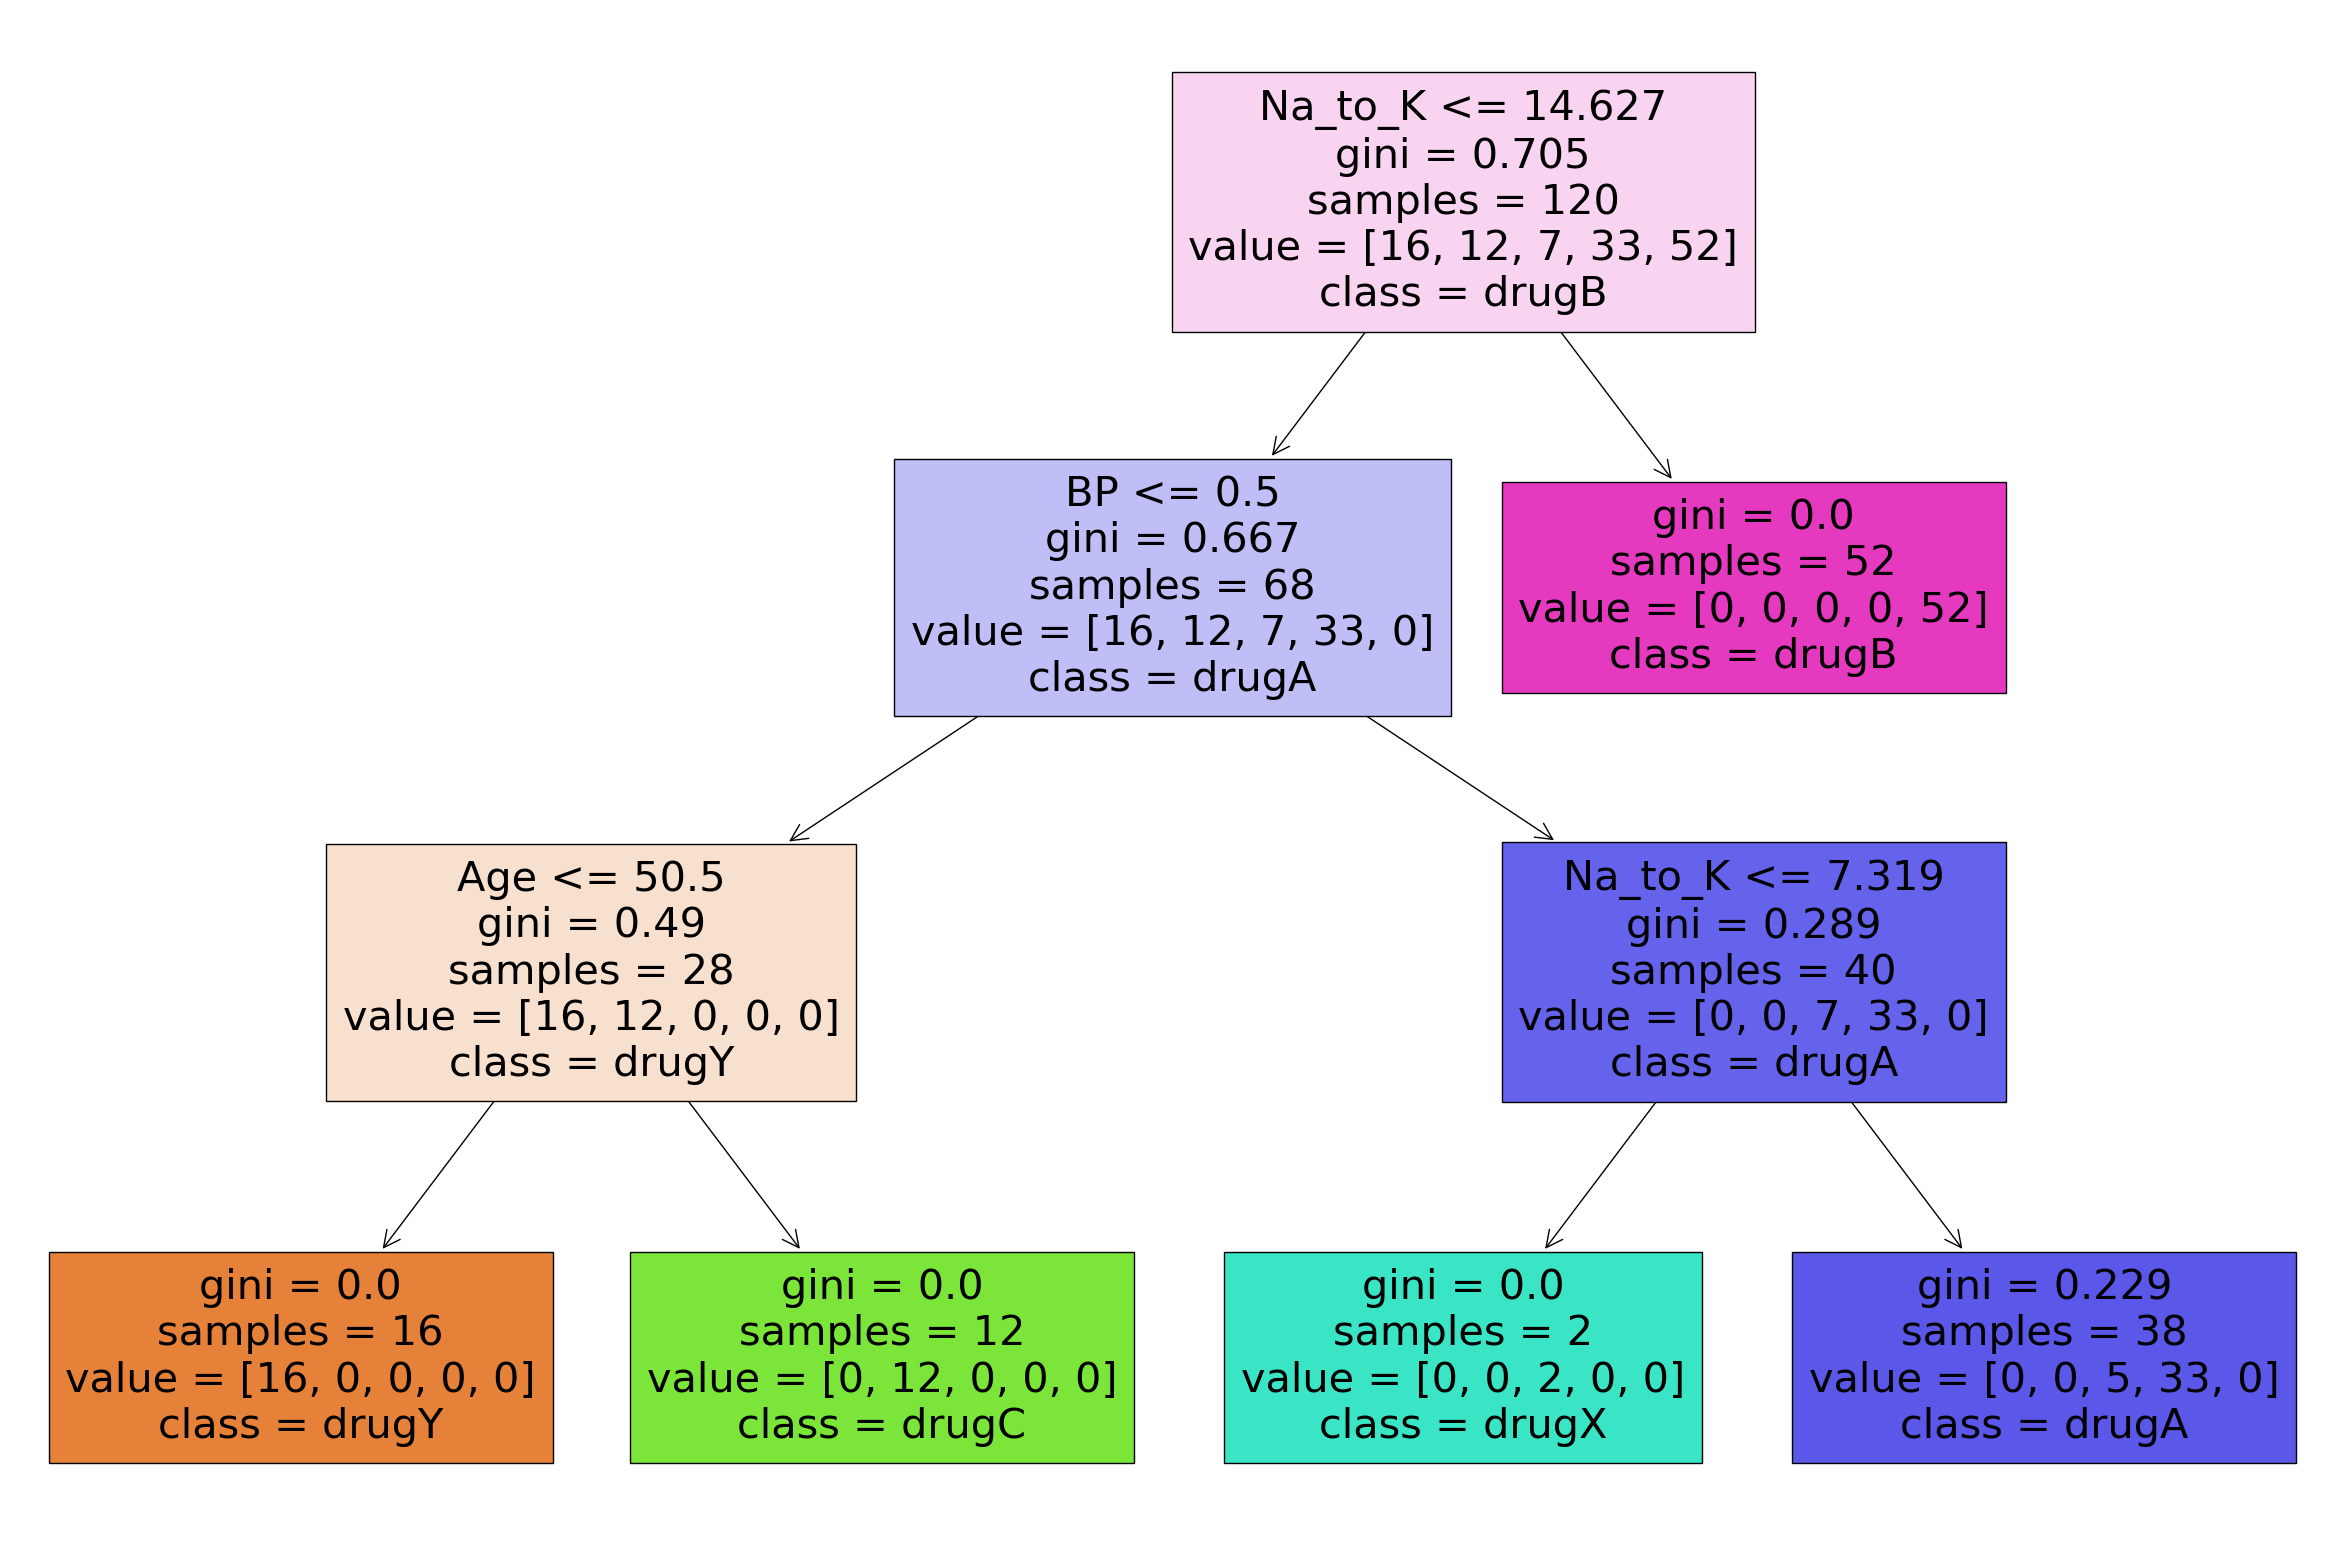

In [24]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

min_samples_leaf - leaf node (yakuniy, barg tugun) hosil qilish uchun eng kam elementlar soni

DecisionTrees's Accuracy:  0.875


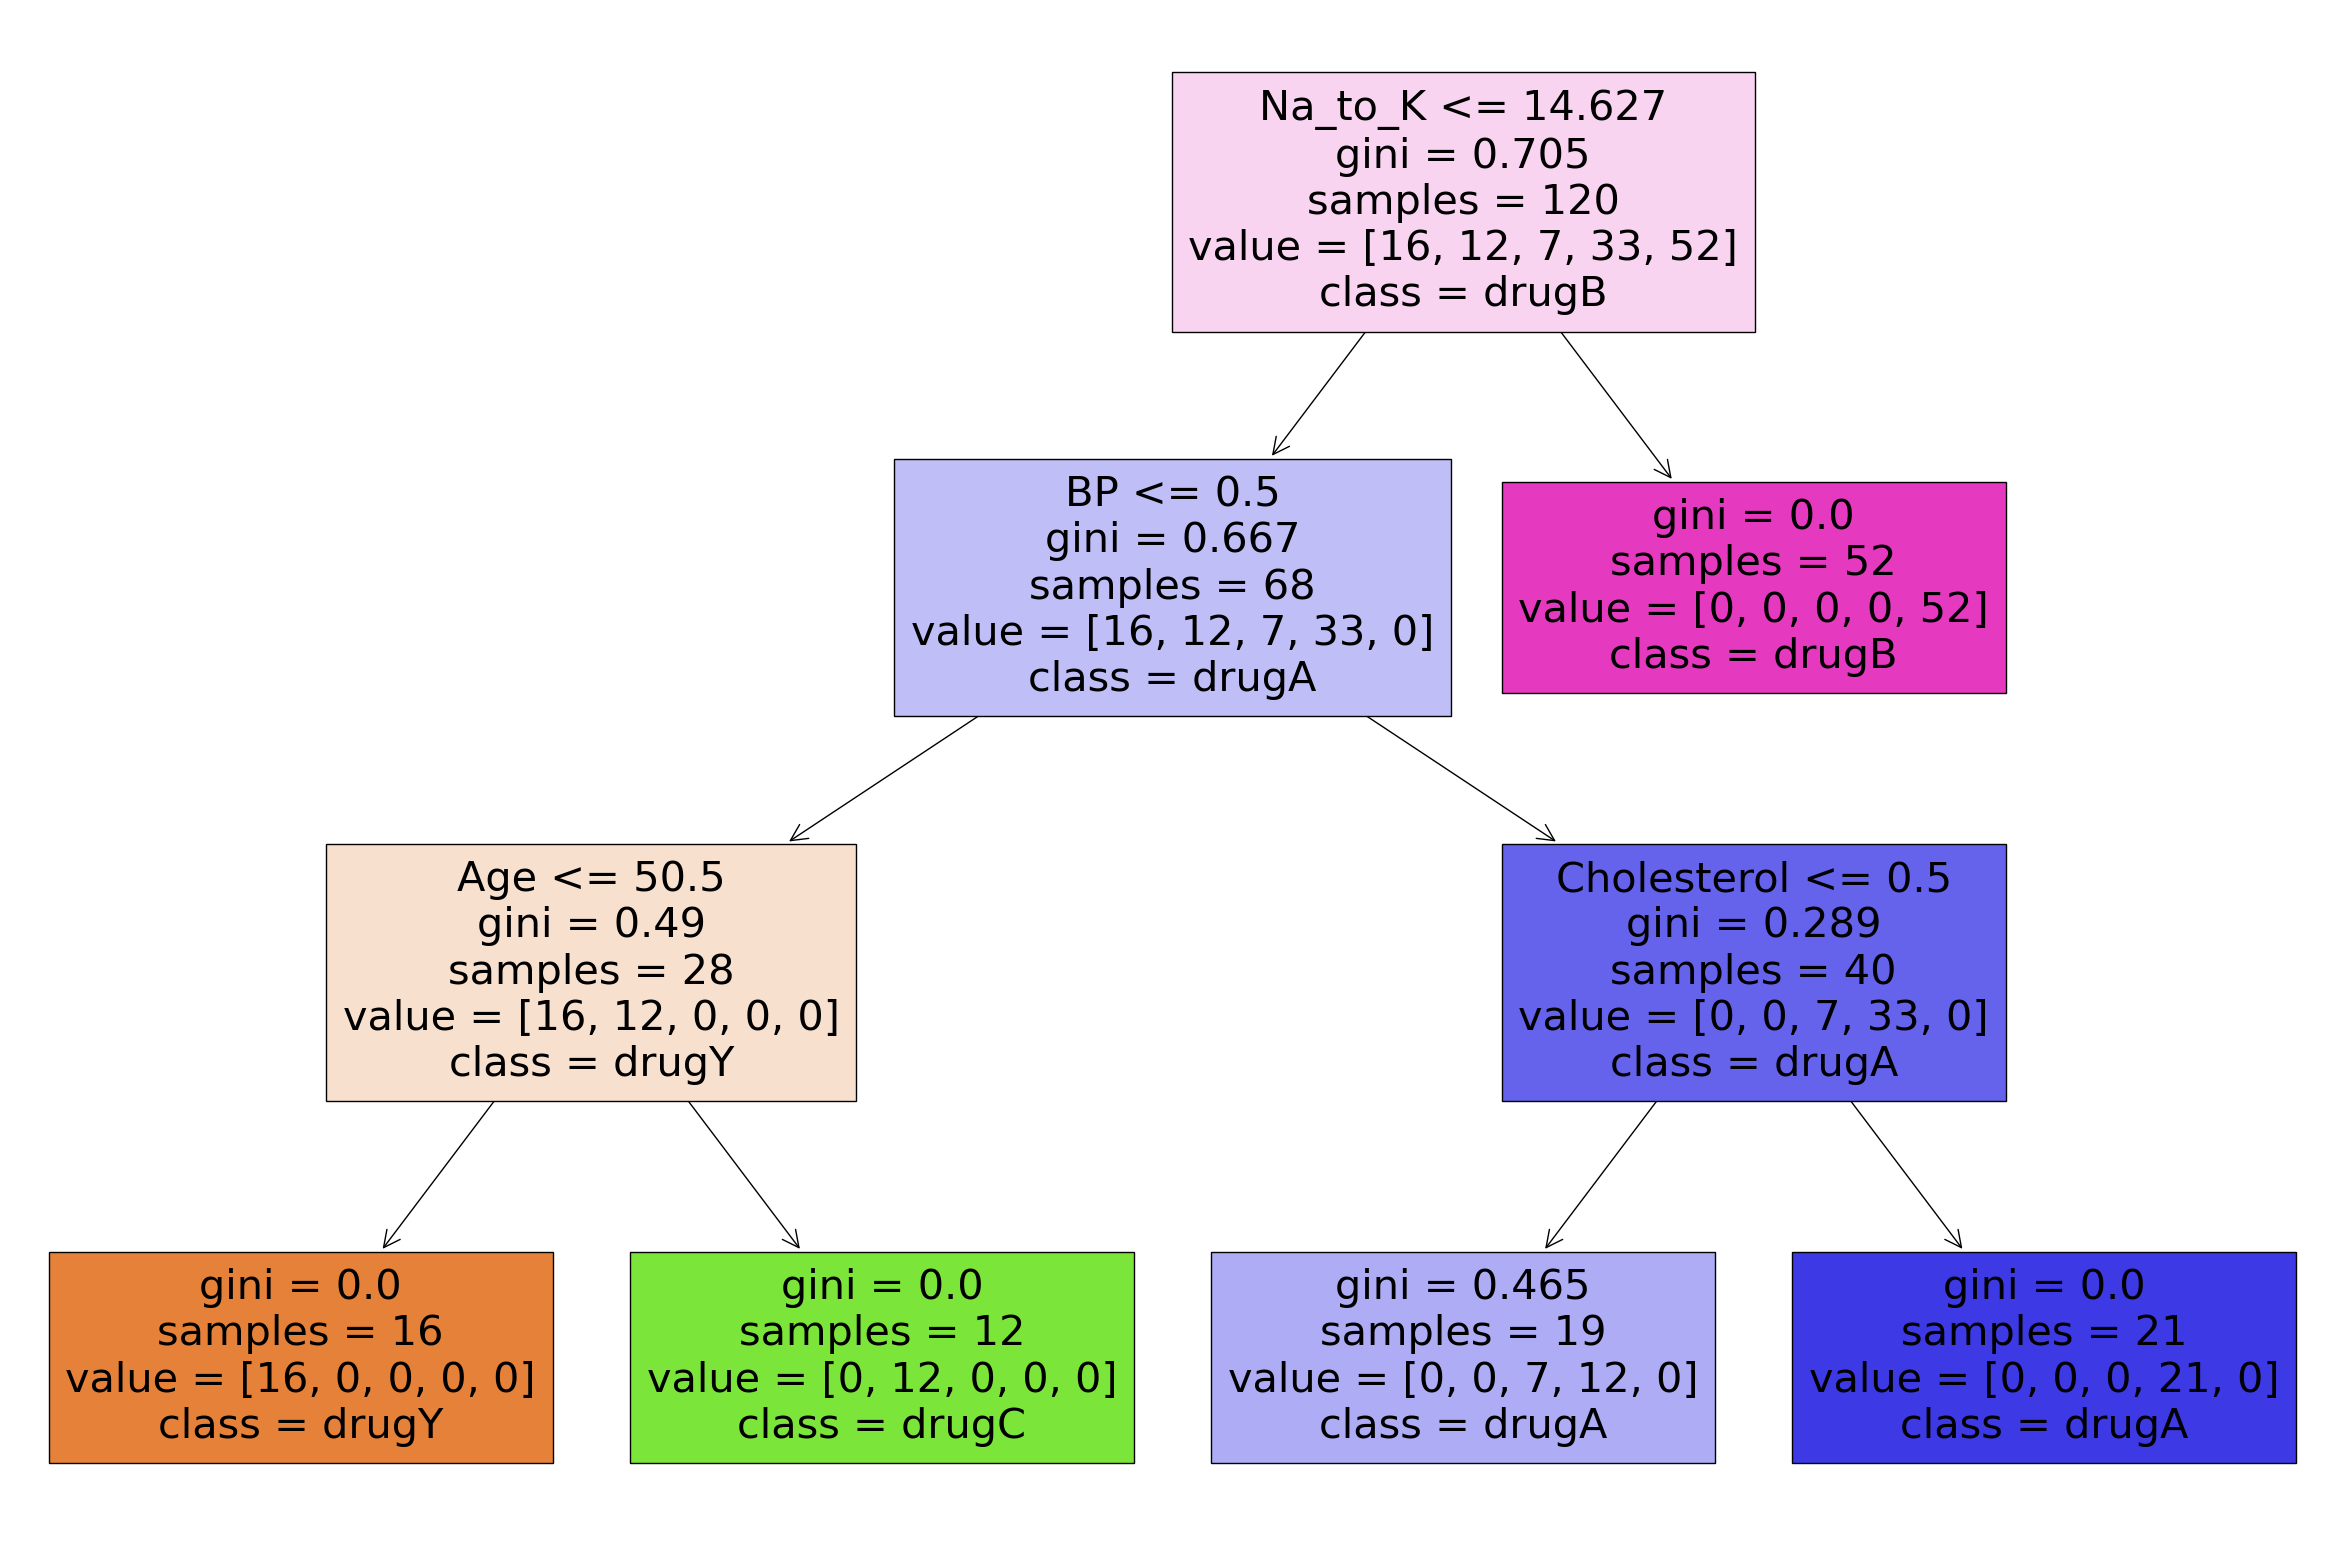

In [26]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

### Random Forest

[Hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
- `n_estimators` - o'rmondagi daraxtlar soni.


In [29]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.56      0.71         9
       drugX       0.83      0.95      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.94        80
   macro avg       0.96      0.90      0.92        80
weighted avg       0.94      0.94      0.93        80



In [31]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9375
